# Compare to alternative models

In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *


In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

In [ ]:
window=BayesWindow(df)

                          rank      loo    p_loo    d_loo weight       se  \
full_lognogmal               0  30576.2  12.8378        0    NaN  82.8145   
full_normal                  1  30493.8  12.8093  82.4357    NaN   95.656   
full_student                 2  30486.6  12.7057  89.6124    NaN  84.2858   
no_group                     3  30181.8  7.47503   394.46    NaN  90.9077   
no_condition                 4  30118.5   3.4276  457.704    NaN  99.6536   
no-treatment                 5  29980.7  11.6315  595.557    NaN   94.921   
no_condition_or_treatment    6  28047.1  1.97594  2529.18      0  100.659   

                               dse warning loo_scale  
full_lognogmal                   0   False       log  
full_normal                 139.11   False       log  
full_student               140.465   False       log  
no_group                   135.965   False       log  
no_condition               135.898   False       log  
no-treatment               130.045   False       log 

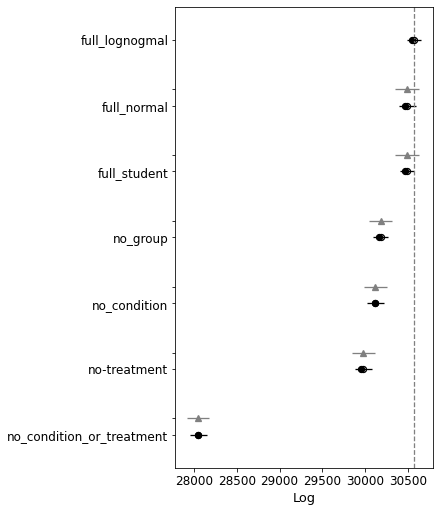

In [4]:
compare_models(df=df,
               models={
                   'no_condition': models.model_hierarchical,
                   'no_condition_or_treatment': models.model_hierarchical,
                   'no-treatment': models.model_hierarchical,
                   'no_group': models.model_hierarchical,
                   'full_normal': models.model_hierarchical,
                   'full_student': models.model_hierarchical,
                   'full_lognogmal': models.model_hierarchical,
               },
               extra_model_args=[
                   {'treatment': 'stim', 'condition': None},
                   {'treatment': None, 'condition': None},
                   {'treatment': None, 'condition': 'neuron'},
                   {'treatment': 'stim', 'condition': 'neuron', 'group': None},
                   {'treatment': 'stim', 'condition': 'neuron', 'group': 'mouse'},
                   {'treatment': 'stim', 'condition': 'neuron', 'dist_y': 'student', 'group': 'mouse'},
                   {'treatment': 'stim', 'condition': 'neuron', 'dist_y': 'lognormal', 'group': 'mouse'},
               ],
               y='isi',
               parallel=True
               );